# Digitizing Loan Approvals for Financial Inclusion: A Machine Learning Approach for Kenyan Microfinance Institutions (MFI's) and Digital Lenders

## Problem Statement

Kenya’s financial landscape is rapidly evolving, with microfinance institutions and digital banking both playing pivotal roles in expanding access to financial services. MFIs have historically bridged the gap left by traditional banks, providing small, accessible loans to underserved communities, women, and small businesses groups often overlooked by mainstream banks. However, MFIs face challenges such as high interest rates, slow manual processes, and limited digital transformation.

Meanwhile, digital banking is driven by high mobile penetration and platforms like M-Pesa, Loop, and Branch. It offers instant, AI-driven loan approvals, lower operational costs, and seamless integration with mobile money. Yet, digital banking also faces challenges, including data privacy, cybersecurity risks, and limited reach in remote areas without smartphones.

This project aims to build a machine learning classification model that predicts whether a loan application should be approved (loan_status: Approved/Not Approved). The solution will help MFIs and digital lenders automate approvals, improve decision fairness, and streamline operations, supporting the shift toward a hybrid, inclusive, and efficient financial ecosystem in Kenya.

## Business Understanding

**Stakeholders:** Microfinance institutions, digital lenders, mobile banks, applicants (especially women, small businesses, and rural communities), fintech investors, and regulators.

**Context and Value Proposition:**

- **MFIs:** Continue to be a lifeline for the unbanked and small businesses, but must digitize to remain competitive. Digitization can reduce bureaucratic delays, lower costs, and expand reach.
- **Digital Lenders:** Offer instant, AI-based approvals and lower fees, but must address data privacy, cybersecurity, and inclusion for non-smartphone users.
- **Applicants:** Benefit from faster, fairer, and more accessible credit, especially women and rural entrepreneurs who have historically been underserved.
- **Regulators:** Are evolving policies to ensure responsible lending and consumer protection as digital banking grows.

**Industry Trends and Opportunities:**

- The future of finance in Kenya is hybrid: MFIs are digitizing, and digital banks are expanding to underserved communities.
- Group lending models and community-based approaches remain important for risk reduction and inclusion.
- There is a strong push for financial inclusion, women’s empowerment, and support for small businesses.

**Objective:**
Deliver a supervised ML model that enables automated, fair, and efficient loan approvals, supporting MFIs and digital lenders in Kenya’s transition to a more inclusive, digital, and resilient financial sector.

# Data Understanding

In this section, we will explore the structure, size, and key features of the loan dataset. Understanding the data is crucial for effective modeling and interpretation.

**Dataset Overview:**

- The dataset contains loan applications with features such as loan amount, term, interest rate, employment details, home ownership, annual income, and loan status (target variable).
- The target variable is `loan_status`, which indicates whether a loan was approved (e.g., 'Fully Paid') or not (e.g., 'Charged Off', 'Default').

**Key Columns:**

- `loan_amnt`: The amount of money requested by the borrower.
- `term`: The duration of the loan (e.g., 36 or 60 months).
- `int_rate`: Interest rate on the loan.
- `grade`/`sub_grade`: Credit grades assigned by the lender.
- `emp_length`: Length of employment.
- `home_ownership`: Home ownership status.
- `annual_inc`: Annual income of the applicant.
- `purpose`: Purpose of the loan.
- `loan_status`: Loan outcome (target).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

loan_df = pd.read_csv('loan.csv', low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# rows and columns
loan_df.shape

(39717, 111)

The dataset contains 39,717 rows and 111 columns. Each row represents a loan record, and each column provides information about the borrower or the loan.


In [3]:
# data types
loan_df.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

The dataset includes 74 columns stored as floats, 24 as objects (text or categorical data), and 13 as integers. This mix of numeric and categorical features will guide how we clean, encode, and prepare the data for modeling.


In [4]:
loan_df.isnull().sum().sort_values(ascending=False)

total_il_high_credit_limit    39717
mo_sin_old_rev_tl_op          39717
bc_util                       39717
bc_open_to_buy                39717
avg_cur_bal                   39717
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 111, dtype: int64

This output lists the number of missing values in each column, sorted from the most missing to the least. For example, some columns such as `total_il_high_credit_limit` and `bc_util` have missing values for all 39,717 loans, while others like `pub_rec`, `open_acc`, and `id` have no missing values at all.


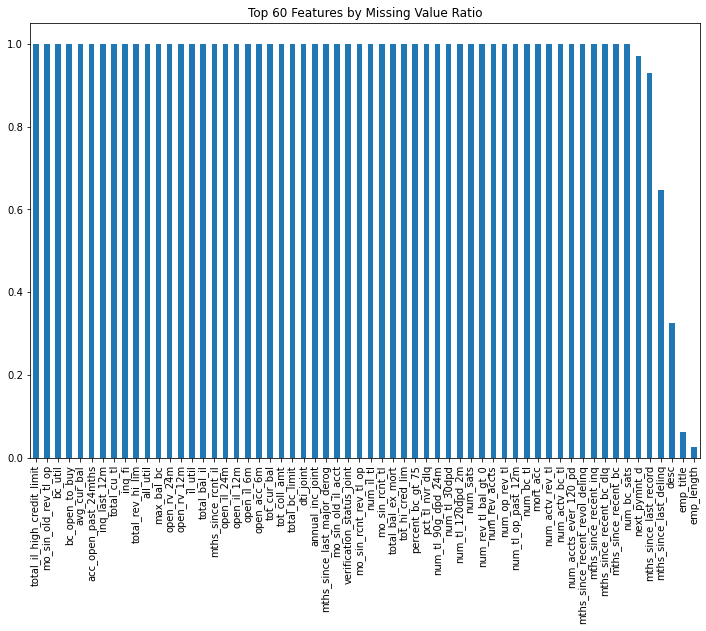

In [5]:
missing_ratio = loan_df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
missing_ratio[missing_ratio>0].head(60).plot(kind='bar')
plt.title("Top 60 Features by Missing Value Ratio")
plt.show()

This graph displays the top 60 features in the loan dataset ranked by their proportion of missing values. By visualizing the missing value ratios, it highlights which columns have the most incomplete data. This insight is essential for guiding data cleaning decisions and ensuring that subsequent analysis and modeling are based on reliable features.
